# 14 Partial Differential Equations — 1

## Solving Laplace's or Poisson's equation

**Poisson's equation** for the electric potential $\Phi(\mathbf{r})$ and the charge density $\rho(\mathbf{r})$:

$$
\nabla^2 \Phi(x, y, z) = -4\pi\rho(x, y, z)\\
$$

For a region of space without charges ($\rho = 0$) this reduces to **Laplace's equation**

$$
\nabla^2 \Phi(x, y, z) = 0
$$


Solutions depend on the **boundary conditions**: 

* the *value of the potential* on the *boundary* or 
* the *electric field* (i.e. the derivative of the potential, $\mathbf{E} = -\nabla\Phi$ *normal to the surface* ($\mathbf{n}\cdot\mathbf{E}$), which directly follows from the charge distribution).

### Example: 2D Laplace equation
$$
\frac{\partial^2 \Phi(x,y)}{\partial x^2} + \frac{\partial^2 \Phi(x,y)}{\partial y^2} = 0
$$
("elliptic PDE")

Boundary conditions:
* square area surrounded by wires
* three wires at ground (0 V), one wire at 100 V

## Finite difference algorithm for Poisson's equation
Discretize space on a lattice (2D) and solve for $\Phi$ on each lattice site.

Taylor-expansion of the four neighbors of $\Phi(x, y)$:

\begin{align}
\Phi(x \pm \Delta x, y) &= \Phi(x, y) \pm \Phi_x \Delta x + \frac{1}{2} \Phi_{xx} \Delta x^2 + \dots\\
\Phi(x, y \pm \Delta y) &= \Phi(x, y) \pm \Phi_y \Delta x + \frac{1}{2} \Phi_{yy} \Delta x^2 + \dots\\
\end{align}

Add equations in pairs: odd terms cancel, and **central difference approximation** for 2nd order partial derivatives (to $\mathcal{O}(\Delta^4)$):

\begin{align}
\Phi_{xx}(x,y) = \frac{\partial^2 \Phi}{\partial x^2} & \approx 
  \frac{\Phi(x+\Delta x,y) + \Phi(x-\Delta x,y) - 2\Phi(x,y)}{\Delta x^2} \\
\Phi_{yy}(x,y) = \frac{\partial^2 \Phi}{\partial y^2} &\approx 
  \frac{\Phi(x,y+\Delta y) + \Phi(x,y-\Delta y) - 2\Phi(x,y)}{\Delta y^2}
\end{align}

Take $x$ and $y$ grids of equal spacing $\Delta$: Discretized Poisson equation

$$
\begin{split}
\Phi(x+\Delta x,y) + \Phi(x-\Delta x,y) +\Phi(x,y+\Delta y) &+ \\
   +\, \Phi(x,y-\Delta y) - 4\Phi(x,y) &= -4\pi\rho(x,y)\,\Delta^2
   \end{split}
$$

Or written for lattice sites $(i, j)$ where 

$$
x = x_0 + i\Delta\quad\text{and}\quad y = y_0 + j\Delta, \quad 0 \leq i,j < N_\text{max}
$$

$$
\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1} - 4 \Phi_{i,j} = -4\pi\rho_{ij} \Delta^2
$$

Defines a system of $N_x \times N_y$ simultaneous algebraic equations for $\Phi_{ij}$ to be solved.

Can be solved directly via matrix approaches (and then is the best solution) but can be unwieldy for large grids.

Alternatively: **iterative solution**:

$$
\begin{split}
4\Phi(x,y) &= \Phi(x+\Delta x,y) + \Phi(x-\Delta x,y) +\\
 &+ \Phi(x,y+\Delta y) + \Phi(x,y-\Delta y) + 4\pi\rho(x,y)\,\Delta^2
\end{split}
$$

$$
\Phi_{i,j} = \frac{1}{4}\Big(\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1}\Big)
     + \pi\rho_{i,j} \Delta^2
$$

* Converged solution at $(i, j)$ will be the average potential from the four neighbor sites + charge density contribution.
* *Not a direct solution*: iterate and hope for convergence.

#### Jacobi method
Do not change $\Phi_{i,j}$ until a complete sweep has been completed.

$$
\Phi_{i,j} = \frac{1}{4}\Big(\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1}\Big)
     + \pi\rho_{i,j} \Delta^2
$$

#### Gauss-Seidel method

$$
\Phi_{i,j} = \frac{1}{4}\Big(\Phi_{i+1,j} + \Phi_{i-1,j} + \Phi_{i,j+1} + \Phi_{i,j-1}\Big)
     + \pi\rho_{i,j} \Delta^2
$$

Immediately use updated new values for $\Phi_{i-1, j}$ and $\Phi_{i, j-1}$ (if starting from $\Phi_{1, 1}$).

Leads to *accelerated convergence* and therefore *less round-off error* (but distorts symmetry of boundary conditions... hopefully irrelevant when converged but check!)

### Solution via relaxation (Gauss-Seidel) 

Solve the box-wire problem on a lattice: The wire at $x=0$ (the $y$-axis) is at 100 V, the other three sides of the box are grounded (0 V).

Note: $\rho=0$ inside the box.

Note for Jupyter notebook use:
* For interactive 3D plots, select
  ```
  %matplotlib widget
  ```
* For standard inline figures (e.g. for exporting the notebook to LaTeX/PDF or html) use 
  ```
  %matplotlib inline
  ```  
  
Enable a matplotlib-Jupyter integration that works for you (try `conda install ipympl` or `pip install ipympl` first to get `%matplotlib widget` working).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# for interactive work
%matplotlib widget

In [2]:
# for plotting/saving
%matplotlib inline

#### Wire on a box: Solution of Laplace's equation with the Gauss-Seidel algorithm

* set boundary conditions
* Implement Gauss-Seidel algorithm
* visualize solution
* does it make sense?
* try higher `Max_iter`

In [3]:
Nmax = 100
Max_iter = 70
Phi = np.zeros((Nmax, Nmax), dtype=np.float64)

# initialize boundaries
# everything starts out zero so nothing special for the grounded wires
Phi[0, :] = 100     # wire at x=0 at 100 V

Nx, Ny = Phi.shape

for n_iter in range(Max_iter):
    for xi in range(1, Nx-1):
        for yj in range(1, Ny-1):
            Phi[xi, yj] = 0.25*(Phi[xi+1, yj] + Phi[xi-1, yj] 
                                + Phi[xi, yj+1] + Phi[xi, yj-1])

#### Visualization of the potential 

In [4]:
# plot Phi(x,y)
x = np.arange(Phi.shape[0])
y = np.arange(Phi.shape[1])
X, Y = np.meshgrid(x, y)

Z = Phi[X, Y]

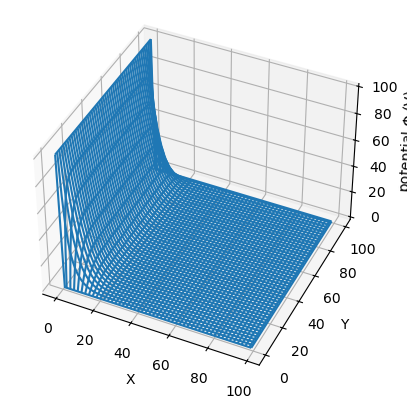

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'potential $\Phi$ (V)')

ax.view_init(elev=40, azim=-65)

### Surfaces and 2D contours 

Nicer plot (use this code for other projects):


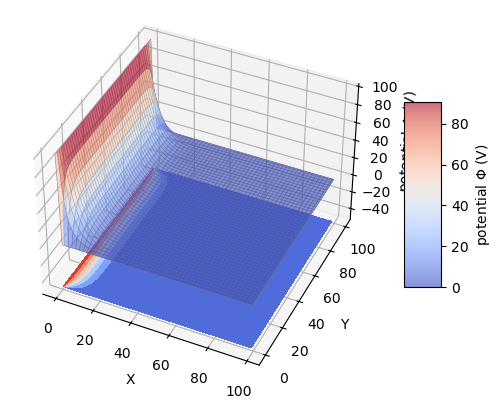

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.5, color="gray")
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, alpha=0.6)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-50, cmap=plt.cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'potential $\Phi$ (V)')
ax.set_zlim(-50, 100)
ax.view_init(elev=40, azim=-65)

cb = fig.colorbar(surf, shrink=0.5, aspect=5)
cb.set_label(r"potential $\Phi$ (V)")

(Note that the calculation above is is *not converged* ... see next lecture.)